In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
fdf = pd.read_csv('https://raw.githubusercontent.com/SARIT42/ML-ProjectsYard/main/Walmart%20Sales%20Prediction/Dataset/featuress.csv') #features df
sdf = pd.read_csv('https://raw.githubusercontent.com/SARIT42/ML-ProjectsYard/main/Walmart%20Sales%20Prediction/Dataset/stores.csv') #stores df
train = pd.read_csv('https://raw.githubusercontent.com/SARIT42/ML-ProjectsYard/main/Walmart%20Sales%20Prediction/Dataset/trainn.csv')
test = pd.read_csv('https://raw.githubusercontent.com/SARIT42/ML-ProjectsYard/main/Walmart%20Sales%20Prediction/Dataset/testt.csv')

In [3]:
fdf.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
fdf.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace=True,axis=1)

In [6]:
fdf.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [7]:
fdf.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,172.460809,7.826821
std,12.987966,18.678607,0.431337,39.738346,1.877259
min,1.000000,-7.290000,2.472000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,132.364839,6.634000
50%,23.000000,60.710000,3.513000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,213.932412,8.567000
max,45.000000,101.950000,4.468000,228.976456,14.313000


In [8]:
fdf['CPI'].fillna(fdf['CPI'].mean(),inplace=True)
fdf['Unemployment'].fillna(fdf['Unemployment'].mean(),inplace=True)

In [9]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           8190 non-null   float64
 5   Unemployment  8190 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [10]:
sdf.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
sdf.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [13]:
df1= fdf.merge(sdf,how='inner',on='Store')
df1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           8190 non-null   float64
 5   Unemployment  8190 non-null   float64
 6   IsHoliday     8190 non-null   bool   
 7   Type          8190 non-null   object 
 8   Size          8190 non-null   int64  
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 583.9+ KB


In [15]:
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [16]:
df1['Week'] = df1.Date.dt.isocalendar().week
df1['Year'] = df1.Date.dt.isocalendar().year

In [17]:
df1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315,9,2010


In [18]:
train=train.merge(df1,on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,9,2010


In [19]:
test=test.merge(df1,on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,44,2012
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,A,151315,45,2012
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,A,151315,46,2012
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,A,151315,47,2012
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,A,151315,48,2012


EDA

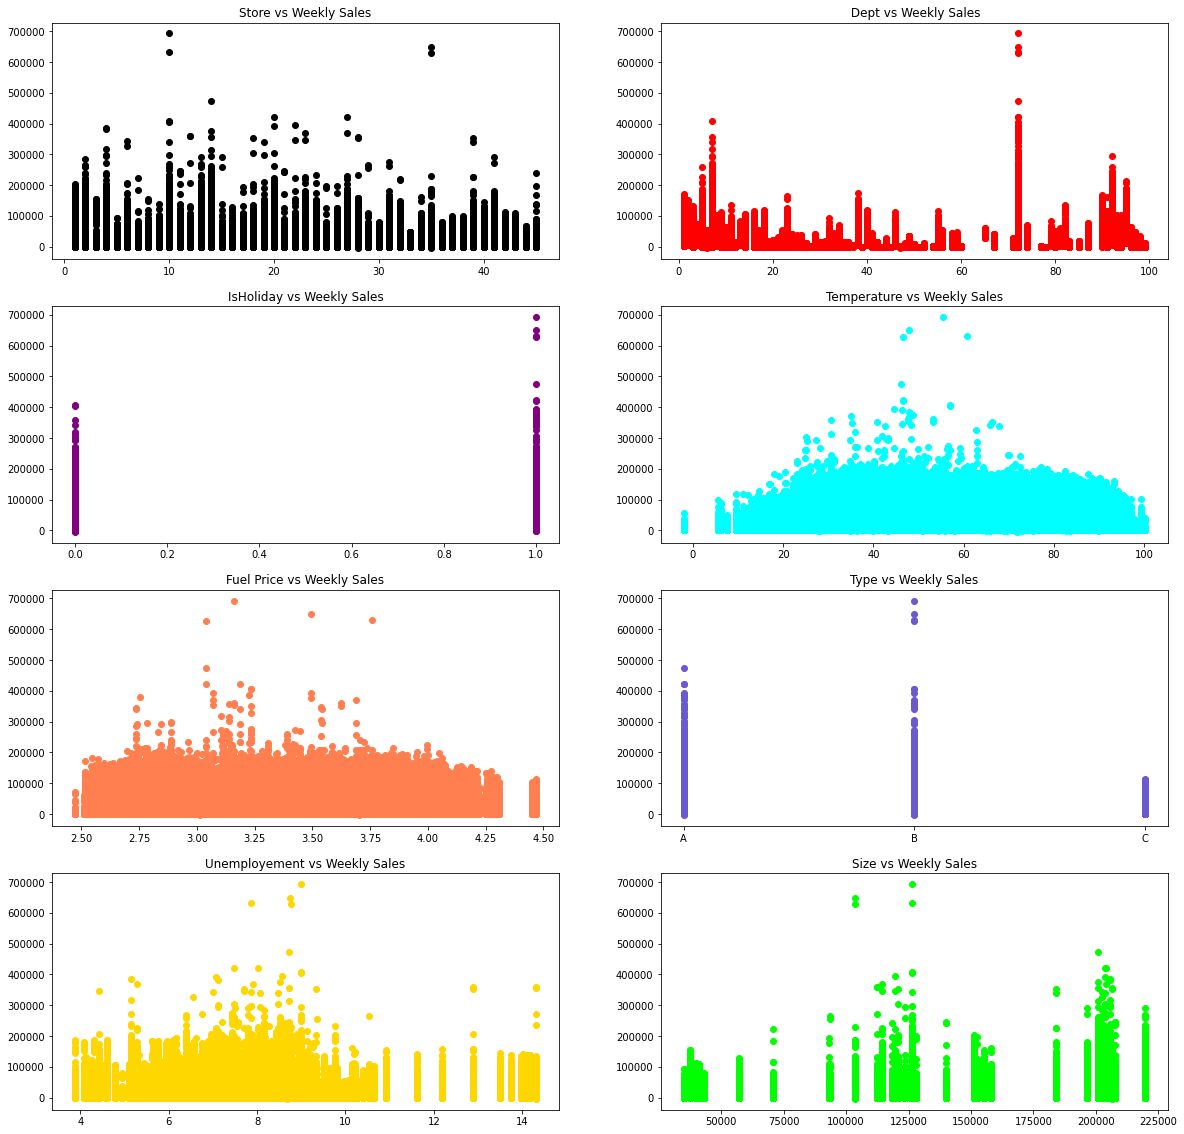

In [20]:
fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(4, 2, 1)
plt.scatter(train['Store'], train['Weekly_Sales'],color='black')

ax2=plt.subplot(4, 2, 2)
plt.scatter(train['Dept'],train['Weekly_Sales'],color='red')

ax3=plt.subplot(4, 2, 3)
plt.scatter(train['IsHoliday'],train['Weekly_Sales'],color='purple')

ax4=plt.subplot(4, 2, 4)
plt.scatter(train['Temperature'], train['Weekly_Sales'],color='aqua')


ax5=plt.subplot(4,2,5)
plt.scatter(train['Fuel_Price'], train['Weekly_Sales'],color='coral')

ax6=plt.subplot(4,2,6)
plt.scatter(train['Type'], train['Weekly_Sales'],color='slateblue')


ax7=plt.subplot(4,2,7)
plt.scatter(train['Unemployment'], train['Weekly_Sales'],color='gold')

ax8=plt.subplot(4,2,8)
plt.scatter(train['Size'], train['Weekly_Sales'],color='lime')

ax1.title.set_text('Store vs Weekly Sales')
ax2.title.set_text(' Dept vs Weekly Sales')
ax3.title.set_text('IsHoliday vs Weekly Sales')
ax4.title.set_text('Temperature vs Weekly Sales')
ax5.title.set_text('Fuel Price vs Weekly Sales')
ax6.title.set_text('Type vs Weekly Sales')
ax7.title.set_text('Unemployement vs Weekly Sales')
ax8.title.set_text('Size vs Weekly Sales')


plt.show()

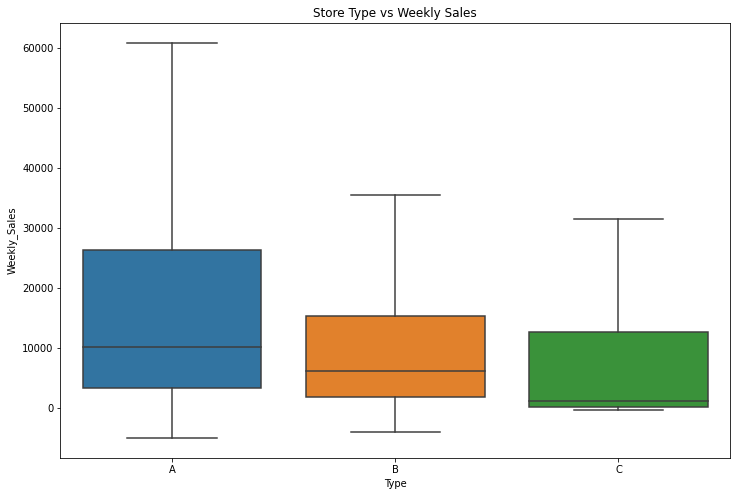

In [21]:
plt.figure(figsize=(12,8))
fig= sns.boxplot(x='Type',y='Weekly_Sales',data=train,showfliers=False)
plt.title("Store Type vs Weekly Sales");

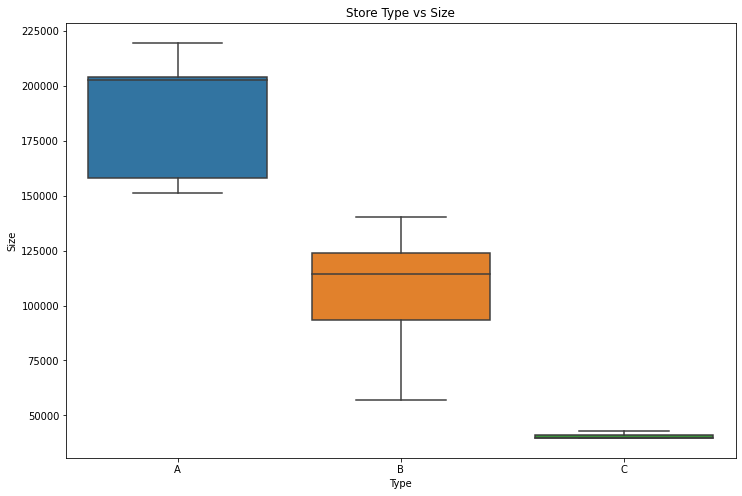

In [22]:
plt.figure(figsize=(12,8))
fig= sns.boxplot(x='Type',y='Size',data=train,showfliers=False)
plt.title("Store Type vs Size");

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train["Type"] = ord_enc.fit_transform(train[["Type"]])
train['Type'] = train['Type'].astype('int32')
train['Type'].value_counts()

0    215478
1    163495
2     42597
Name: Type, dtype: int64

In [24]:
ord_enc = OrdinalEncoder()
test["Type"] = ord_enc.fit_transform(test[["Type"]])
test['Type'] = test['Type'].astype('int32')
test['Type'].value_counts()

0    58713
1    44500
2    11851
Name: Type, dtype: int64

In [25]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,0,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,0,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,0,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,0,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,0,151315,9,2010


In [26]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,0,151315,44,2012
1,1,1,2012-11-09,False,61.24,3.314,223.481307,6.573,0,151315,45,2012
2,1,1,2012-11-16,False,52.92,3.252,223.512911,6.573,0,151315,46,2012
3,1,1,2012-11-23,True,56.23,3.211,223.561947,6.573,0,151315,47,2012
4,1,1,2012-11-30,False,52.34,3.207,223.610984,6.573,0,151315,48,2012


[]

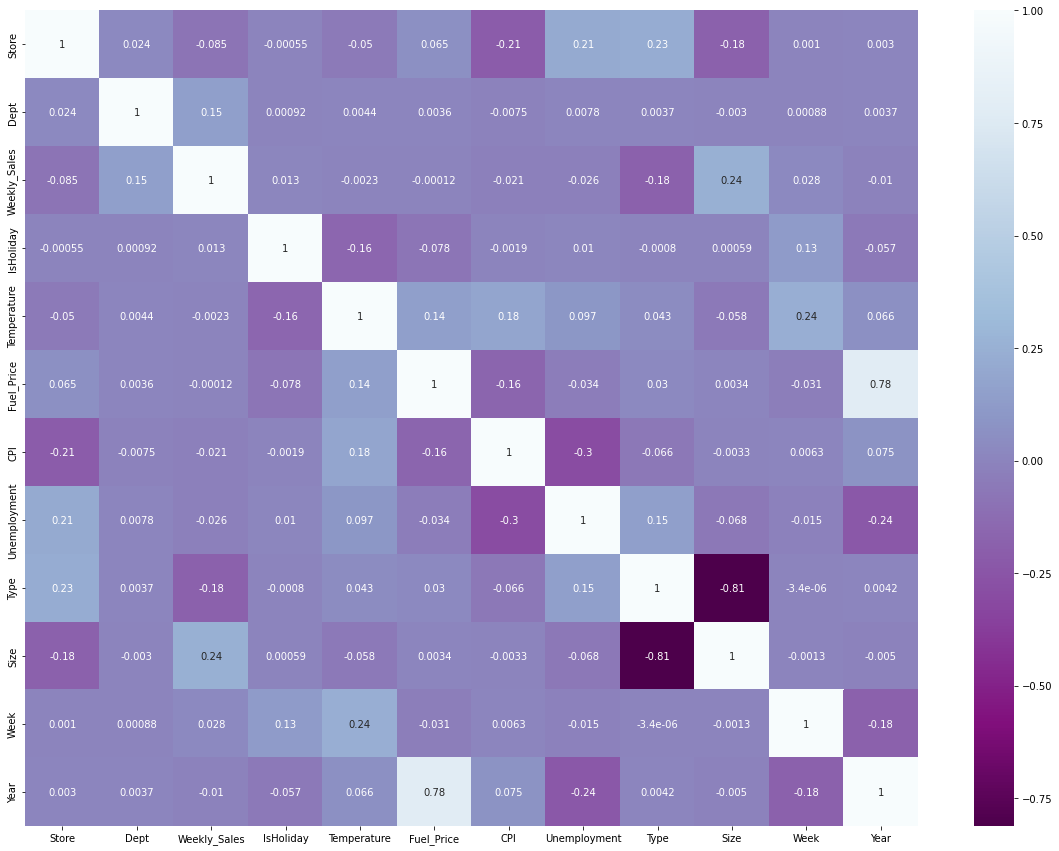

In [27]:
corr = train.corr()
plt.figure(figsize=(20, 15))                                   # plotting correlation among all the features
sns.heatmap(corr, annot=True,cmap="BuPu_r")
plt.plot()

In [28]:
x = train[['Store','Type','Unemployment', 'Dept','CPI', 'IsHoliday','Size','Week','Year']] 
y = train['Weekly_Sales']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)     #train test split

ML Models:

In [30]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train,y_train)

rf.score(x_test,y_test)


0.9754053344077306

In [36]:
from xgboost import XGBRegressor
xgb= XGBRegressor()
xgb.fit(x_train,y_train)

xgb.score(x_test,y_test)

[13:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7355867327390447

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9644849900854366